In [1]:
%matplotlib inline
from matplotlib import pylab as plt
import os
from geonotebook.wrappers import RasterData, RasterDataCollection

## Raster Data

In [ ]:
rd = RasterData('/tmp/L57.Globe.month09.2010.hh09vv04.h6v1.doy247to273.NBAR.v3.0.tiff')
M.add_layer(rd[[1,2,3]], opacity=0.9, range=(0.,0.2)).then(
  M.set_center(-120.32, 47.84, 9))

In [ ]:
d, n = M.layers.annotation.polygons[0].data.next()

In [ ]:
from skimage.exposure import rescale_intensity
fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(rescale_intensity(n, (0, 0.3)), interpolation='none')

In [ ]:
M.remove_layer(M.layers[-1].name)

## Raster Data Collection

In [2]:
DATA_DIR="/data/kotfic/NEX/golden_tile_layer/WELD/golden_tiles/geotiff/NBAR/"

In [3]:
def sort_NBAR(a, b):
  am, ay = int(a.split(".")[2][-2:]), int(a.split(".")[3])
  bm, by = int(b.split(".")[2][-2:]), int(b.split(".")[3])

  if ay < by:
    return -1
  elif ay > by:
    return 1
  elif by == ay:
    if am < bm:
      return -1
    elif am > bm:
      return 1
    else:
      return 0
  

PATHS = [DATA_DIR + p for p in sorted(os.listdir(DATA_DIR), sort_NBAR)]

In [4]:
rdc = RasterDataCollection(PATHS)

In [5]:
import matplotlib as mpl
import numpy as np

def ndvi_colormap(numcolors=11, name='custom_div_cmap', 
                  mincol='blue', midcol='beige', maxcol='green'):
  return mpl.colors.LinearSegmentedColormap.from_list(
    name=name, colors=[mincol, midcol, maxcol], N=numcolors)

cmap = ndvi_colormap()

colormap = [{"color": mpl.colors.rgb2hex(cmap(i)), "quantity": v }
 for i,v in zip(range(cmap.N),np.linspace(min(rdc[:,4].min), max(rdc[:,4].max), cmap.N))]

In [6]:
M.add_layer(rdc[:,4], 'NBAR', opacity=0.8, colormap=colormap).then(
 M.set_center(-120.32, 47.84, 9))

In [7]:
M.layers[-1].next()

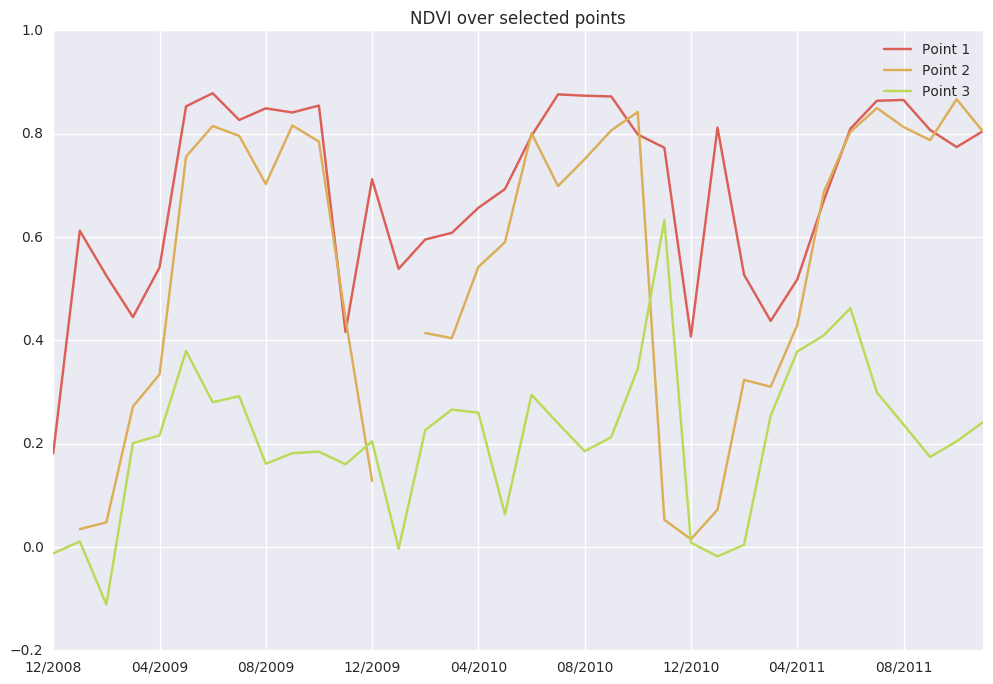

In [8]:
import seaborn as sns

labels = ["{}/{}".format(n.split(".")[2][5:], n.split(".")[3]) for n in 
                         M.layers[-1].data.get_names()]

fig, ax = plt.subplots(1,1, figsize=(12, 8))
plt.title("NDVI over selected points")
plt.xticks(range(len(M.layers[-1].data))[::4], labels[::4])

for p in M.layers.annotation.points:
  layer, data = p.data.next()
  ax.plot(data, color=p.rgb, label=p.name)
  
plt.legend()